In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import read_mist_models
from pathlib import Path

In [2]:
fig_dir =  Path('./../reports/figures/')

In [3]:
cluster = pd.read_csv('./../hw5_m67_cmd.dat', delimiter='\s+')
distance = 1000 / 1.13

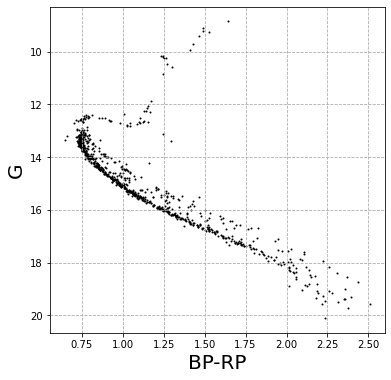

In [4]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(cluster['BP'] - cluster['RP'], cluster['G'], s=1, c='black')
ax.grid(c='#aaaaaa', ls='--')

ax.invert_yaxis()
plt.ylabel(r"G", size=20)
plt.xlabel(r"BP-RP", size=20)
plt.savefig(fig_dir / '5CMD_G_BPRP.png', dpi=300)

In [5]:
isocmd0 = read_mist_models.ISOCMD('./../MIST_iso_Av0.iso.cmd')
isocmd01 = read_mist_models.ISOCMD('./../MIST_iso_Av01.iso.cmd')
isocmd02 = read_mist_models.ISOCMD('./../MIST_iso_Av02.iso.cmd')

Reading in: ./../MIST_iso_Av0.iso.cmd
Reading in: ./../MIST_iso_Av01.iso.cmd
Reading in: ./../MIST_iso_Av02.iso.cmd


In [6]:
# print('version: ', isocmd.version)
# print('photometric system: ', isocmd.photo_sys)
# print('abundances: ', isocmd.abun)
# print('rotation: ', isocmd.rot)
# print('ages: ', [round(x,2) for x in isocmd.ages])
# print('number of ages: ', isocmd.num_ages)
# print('available columns: ', isocmd.hdr_list)
# print('Av extinction: ', isocmd.Av_extinction)

In [7]:
isocmd0.ages[11]

9.55

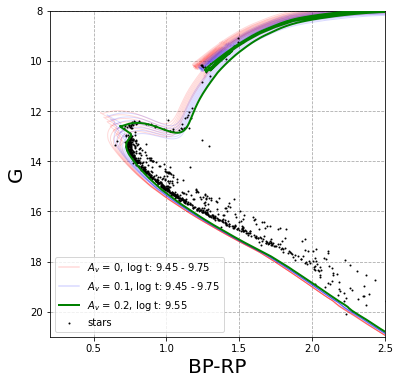

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot([0,0], [1,1], label=r'$A_v$ = 0, log t: 9.45 - 9.75',c='red', alpha=0.15)
ax.plot([0,0], [1,1], label=r'$A_v$ = 0.1, log t: 9.45 - 9.75',c='blue', alpha=0.15)

for age in isocmd0.ages[9:-5]:
    age_ind = isocmd0.age_index(age) #returns the index for the desired age
    G = isocmd0.isocmds[age_ind]['Gaia_G_EDR3']
    BP = isocmd0.isocmds[age_ind]['Gaia_BP_EDR3']
    RP = isocmd0.isocmds[age_ind]['Gaia_RP_EDR3']
    ax.plot(BP - RP, G + 5 * np.log10(distance) - 5, lw=1, c='red', alpha=0.15)
    

for age in isocmd01.ages[9:-5]:
    age_ind = isocmd01.age_index(age) #returns the index for the desired age
    G = isocmd01.isocmds[age_ind]['Gaia_G_EDR3']
    BP = isocmd01.isocmds[age_ind]['Gaia_BP_EDR3']
    RP = isocmd01.isocmds[age_ind]['Gaia_RP_EDR3']
    ax.plot(BP - RP, G + 5 * np.log10(distance) - 5, lw=1, c='blue', alpha=0.15)
    
age = isocmd02.ages[11]
age_ind = isocmd02.age_index(age) #returns the index for the desired age
G = isocmd02.isocmds[age_ind]['Gaia_G_EDR3']
BP = isocmd02.isocmds[age_ind]['Gaia_BP_EDR3']
RP = isocmd02.isocmds[age_ind]['Gaia_RP_EDR3']
ax.plot(BP - RP, G + 5 * np.log10(distance) - 5, lw=2, c='green', label=r'$A_v$ = 0.2, log t: 9.55', zorder=15)


ax.scatter(cluster['BP'] - cluster['RP'], cluster['G'], s=1, c='black', label='stars', zorder=10)
ax.grid(c='#aaaaaa', ls='--')

plt.legend()
ax.set_xlim(0.2,2.5)
ax.set_ylim(8,21)
ax.invert_yaxis()
plt.ylabel(r"G", size=20)
plt.xlabel(r"BP-RP", size=20)

plt.savefig(fig_dir / '5CMD_isochrone.png', dpi=300)

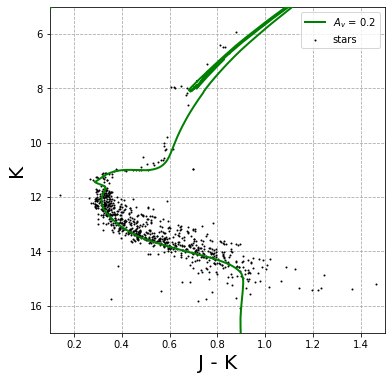

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))


# age = isocmd0.ages[11]
# age_ind = isocmd0.age_index(age) #returns the index for the desired age

# ax.plot(J - K, K + 5 * np.log10(distance) - 5, lw=1, c='red')
    
# age = isocmd01.ages[11]
# age_ind = isocmd01.age_index(age) #returns the index for the desired age
# J = isocmd01.isocmds[age_ind]['2MASS_J']
# K = isocmd01.isocmds[age_ind]['2MASS_Ks']
# ax.plot(J - K, K + 5 * np.log10(distance) - 5, lw=1, c='blue')
    
age = isocmd02.ages[11]
age_ind = isocmd02.age_index(age) #returns the index for the desired age
J = isocmd02.isocmds[age_ind]['2MASS_J']
K = isocmd02.isocmds[age_ind]['2MASS_Ks']
ax.plot(J - K, K + 5 * np.log10(distance) - 5, lw=2, c='green', label=r'$A_v$ = 0.2', zorder=15)

ax.scatter(cluster['J'] - cluster['K'], cluster['K'], s=1, c='black', label='stars', zorder=10)
ax.grid(c='#aaaaaa', ls='--')
plt.legend()

ax.set_xlim(0.1,1.5)
ax.set_ylim(5,17)
ax.invert_yaxis()
plt.ylabel(r"K", size=20)
plt.xlabel(r"J - K", size=20)

plt.savefig(fig_dir / '5CMD_isochroneIR.png', dpi=300)

# binaries

In [10]:
def get_luminosity(mass):
    luminosity = isocmd02.isocmds[age_ind]['log_L'][np.argmin(abs(isocmd0.isocmds[age_ind]['star_mass'][:-1220] - mass))]
    return luminosity

def get_magnitude(band, luminosity):
    mag = isocmd02.isocmds[age_ind][band][np.argmin(abs(isocmd0.isocmds[age_ind]['log_L'][:-1220] - luminosity))]
    return mag

In [11]:
masses_primary = np.arange(0.5, 1.3, 0.1)

In [48]:
def get_cmd_data(m1, N_binaries, band1, band2, band3):
    masses_secondary = np.linspace(0.1, m1, N_binaries)
    l1 = get_luminosity(m1)
    Gs, BPs, RPs = [], [], []

    for m2 in masses_secondary:
        l2 = get_luminosity(m2)
        G1, G2   = get_magnitude(band1, l1), get_magnitude(band1, l2)
        BP1, BP2 = get_magnitude(band2, l1), get_magnitude(band2, l2)
        RP1, RP2 = get_magnitude(band3, l1), get_magnitude(band3, l2)

        Gs.append(G1   - 2.5 * np.log10(1 + 2.512 ** (G1 - G2)))
        BPs.append(BP1 - 2.5 * np.log10(1 + 2.512 ** (BP1 - BP2)))
        RPs.append(RP1 - 2.5 * np.log10(1 + 2.512 ** (RP1 - RP2)))

    Gs, BP_RPs = np.array(Gs), np.array(BPs) - np.array(RPs)
    return Gs, BP_RPs

In [49]:
N_binaries = 15
Gs = np.zeros((len(masses_primary), N_binaries))
colors = np.zeros((len(masses_primary), N_binaries))

In [50]:
for i, m1 in enumerate(masses_primary):
    Gs[i], colors[i] = get_cmd_data(m1, N_binaries, 'Gaia_G_EDR3', 'Gaia_BP_EDR3', 'Gaia_RP_EDR3')

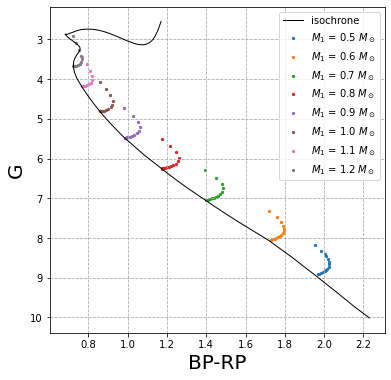

In [51]:
fig, ax = plt.subplots(figsize=(6, 6))
for i in range(len(masses_primary)):
    ax.scatter(colors[i], Gs[i], s=5, label=fr'$M_1$ = {round(masses_primary[i], 1)} $M_\odot$')
    
age = isocmd02.ages[11]
age_ind = isocmd02.age_index(age) #returns the index for the desired age
G = isocmd02.isocmds[age_ind]['Gaia_G_EDR3'][50:-1220]
BP = isocmd02.isocmds[age_ind]['Gaia_BP_EDR3'][50:-1220]
RP = isocmd02.isocmds[age_ind]['Gaia_RP_EDR3'][50:-1220]
ax.plot(BP - RP, G, lw=1, c='black', label='isochrone')

plt.ylabel(r"G", size=20)
plt.xlabel(r"BP-RP", size=20)
plt.legend()
# ax.set_xlim(0.2,2.5)
# ax.set_ylim(0, 10)
ax.grid(c='#aaaaaa', ls='--')
ax.invert_yaxis()
plt.savefig(fig_dir / '5binaries.png', dpi=300, bbox_inches='tight')

In [52]:
N_binaries = 15
Ks = np.zeros((len(masses_primary), N_binaries))
colors = np.zeros((len(masses_primary), N_binaries))

In [53]:
for i, m1 in enumerate(masses_primary):
    Ks[i], colors[i] = get_cmd_data(m1, N_binaries, '2MASS_Ks', '2MASS_J', '2MASS_Ks')

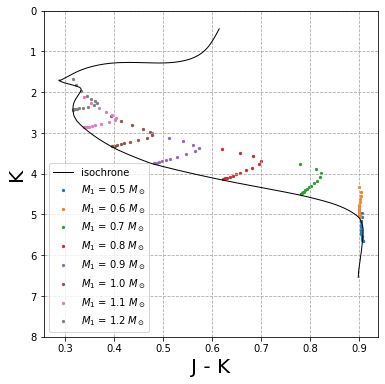

In [54]:
fig, ax = plt.subplots(figsize=(6, 6))
for i in range(len(masses_primary)):
    ax.scatter(colors[i], Ks[i], s=5, label=fr'$M_1$ = {round(masses_primary[i], 1)} $M_\odot$')
    
age = isocmd02.ages[11]
age_ind = isocmd02.age_index(age) #returns the index for the desired age
J = isocmd02.isocmds[age_ind]['2MASS_J'][50:-1220]
K = isocmd02.isocmds[age_ind]['2MASS_Ks'][50:-1220]
ax.plot(J - K, K, lw=1, c='black', label='isochrone')

plt.ylabel(r"K", size=20)
plt.xlabel(r"J - K", size=20)
plt.legend()
# ax.set_xlim(0.2,2.5)
ax.set_ylim(0, 8)
ax.grid(c='#aaaaaa', ls='--')
ax.invert_yaxis()
plt.savefig(fig_dir / '5binaries_IR.png', dpi=300, bbox_inches='tight')

## 3

In [62]:
from scipy import integrate
from scipy import interpolate

In [63]:
rho_inis = np.geomspace(1e6, 1e10, 21)

In [64]:
A = 6.002e22
G = 6.67e-8
B = 9.739e5
mu_e = 2
solar_mass = 1.989e33 # g
solar_radius = 6.955e10 # cm

m_p = 1.672614e-24 #g

In [65]:
def solver(r, Y):
    c1 = - 1 / (Y[0] * (1 + Y[0] ** 2))
    c2 = - 2 / r
    c3 = - np.pi * B ** 2 * mu_e ** 2 * G / 2 / A
    g  = Y[0] ** 2 * np.sqrt(1 + Y[0] ** 2)
    return [Y[1], c1 * Y[1] ** 2 + 
                  c2 * Y[1] + 
                  c3 * g
           ]

In [66]:
def rho(r):
    density = interpolate.interp1d(rs, rhos)
    return density(r)

In [67]:
def mass(r):
    return 4 * np.pi * r ** 2 * rho(r)

In [68]:
r_min = 1e-1
r_max = 1e11
mu_e = 2

masses = []
radii = []
for rho_ini in np.geomspace(1e4, 1e10, 51):
        ICs = [(rho_ini / (B * mu_e)) ** (1/3), 0]
        sol = integrate.solve_ivp(solver, (r_min, r_max), ICs)

        rhos = B * mu_e * sol.y[0] ** 3
        rs = sol['t']
        R_max = rs[-1]
        M = integrate.trapz(mass(rs), rs)
        masses.append(M)
        radii.append(R_max)

In [69]:
radii = np.array(radii)
masses = np.array(masses)

In [70]:
r_min = 1e-1
r_max = 1e11
mu_e = 2.15


masses_metal = []
radii_metal = []
for rho_ini in np.geomspace(1e4, 4e9, 51):
        ICs = [(rho_ini / (B * mu_e)) ** (1/3), 0]
        sol = integrate.solve_ivp(solver, (r_min, r_max), ICs)

        rhos = B * mu_e * sol.y[0] ** 3
        rs = sol['t']
        R_max = rs[-1]
        M = integrate.trapz(mass(rs), rs)
        masses_metal.append(M)
        radii_metal.append(R_max)

In [71]:
radii_metal = np.array(radii_metal)
masses_metal = np.array(masses_metal)

In [72]:
polytrop = 2e9 * (0.1 * solar_mass / masses) ** (1/3)

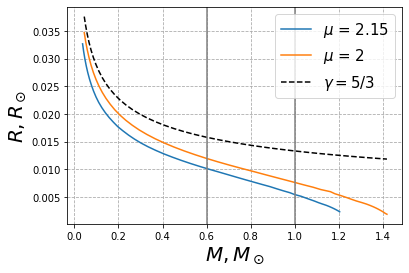

In [86]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot( masses_metal / solar_mass, radii_metal / solar_radius, label=r'$\mu$ = 2.15')
ax.plot( masses / solar_mass, radii / solar_radius, label=r'$\mu$ = 2')
ax.plot( masses / solar_mass, polytrop / solar_radius, c='black', ls='--', label=r'$\gamma = 5/3$')
ax.axvline(0.6, c='gray')
ax.axvline(1, c='grey')
# # plt.ylim(0, 1e33)
# plt.xlim(8e8, 1e9)
ax.grid(c='#aaaaaa', ls='--')
plt.legend(fontsize=15)
plt.ylabel(r'$R, R_\odot$', size=20)
plt.xlabel(r'$M, M_\odot$', size=20)
plt.savefig(fig_dir / '5RM.png', dpi=300, bbox_inches='tight')

## b

In [74]:
mu_e = 2
ICs = [(3e9 / (B * mu_e)) ** (1/3), 0]
sol = integrate.solve_ivp(solver, (r_min, r_max), ICs)

rhos = B * mu_e * sol.y[0] ** 3
rs = sol['t']
R_max = rs[-1]
M = integrate.trapz(mass(rs), rs)
print(M / solar_mass, R_max / solar_radius)

1.386668383559321 0.0026694782154688323


## c

In [75]:
def mass_full(r):
    return 4 / 3 * np.pi * r ** 3 * rho(r) 

In [76]:
def energy(r):
    return - G * mass_full(r) * 4 * np.pi * r * rho(r) 

In [77]:
mu_e = 2
ICs = [(3e9 / (B * mu_e)) ** (1/3), 0]
sol = integrate.solve_ivp(solver, (r_min, r_max), ICs)

rhos = B * mu_e * sol.y[0] ** 3
rs = sol['t']
R_max = rs[-1]

energy_potential = integrate.trapz(energy(rs), rs)

In [78]:
energy_potential

-1.5808980772225884e+51

In [79]:
def energy_degeneracy(r):
    x = (rho(r) / B / mu_e) ** (1/3)
    return 1.44e24 * x ** 4 / ((1 + x ** 2) ** 0.5 + 1) * 4 * np.pi * r ** 2

In [80]:
energy_deg = integrate.trapz(energy_degeneracy(rs), rs)

In [81]:
energy_deg

1.7204876822046757e+51

In [82]:
energy_potential + energy_deg

1.3958960498208725e+50

In [83]:
number_burns = M / 12 / m_p / 2

In [84]:
energy_burning = number_burns * 14 * 1.60218e-6

In [85]:
energy_burning

1.5411317554331943e+51

In [43]:
energy_ejecta = energy_burning - (energy_potential + energy_deg)

In [44]:
(energy_ejecta * 2 / M) ** 0.5 / 1e5

10084.468335078729